In [20]:
# target parameters of f(x) = a + bx + cx^2 + dx^3
a = 2
b = -3
c = -2
d = 3

In [31]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1.5, 1.5, 500)
x_valid.sort()
y_target = a + b * x_valid + c* x_valid**2 + d * x_valid**3 # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b * x_train + c* x_train**2 + d * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c* x_valid**2 + d * x_valid**3, sigma)

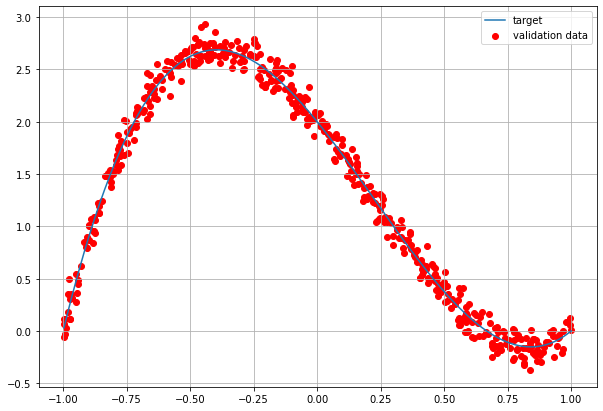

In [22]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
# model.add(Dense(1, input_shape=(1,)))

model.add(Dense(20, input_shape=(1,), activation='relu'))
# Adds another layer with 18 units, each connected to 27 outputs of previous layer
model.add(Dense(12, activation='relu'))
model.add(Dense(7, activation='relu'))

# Last layer with 9 units, each connected to 18 outputs of previous layer
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [24]:
# get a summary of our composed model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_9 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 91        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [25]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=100, epochs=40,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/40
50/50 [==============================] - 1s 7ms/step - loss: 1.6319 - mse: 1.6319 - val_loss: 0.8601 - val_mse: 0.8601
Epoch 2/40
50/50 [==============================] - 0s 4ms/step - loss: 0.6248 - mse: 0.6248 - val_loss: 0.4773 - val_mse: 0.4773
Epoch 3/40
50/50 [==============================] - 0s 5ms/step - loss: 0.4058 - mse: 0.4058 - val_loss: 0.3637 - val_mse: 0.3637
Epoch 4/40
50/50 [==============================] - 0s 5ms/step - loss: 0.3147 - mse: 0.3147 - val_loss: 0.2974 - val_mse: 0.2974
Epoch 5/40
50/50 [==============================] - 0s 4ms/step - loss: 0.2589 - mse: 0.2589 - val_loss: 0.2515 - val_mse: 0.2515
Epoch 6/40
50/50 [==============================] - 0s 4ms/step - loss: 0.2200 - mse: 0.2200 - val_loss: 0.2137 - val_mse: 0.2137
Epoch 7/40
50/50 [==============================] - 0s 3ms/step - loss: 0.1869 - mse: 0.1869 - val_loss: 0.1814 - val_mse: 0.1814
Epoch 8/40
50/50 [==============================] - 0s 4ms/step - loss: 0.1575 - mse: 0.15

In [26]:
# return weights and biases
model.get_weights()

[array([[-0.32513338,  0.32229444, -0.20587374,  0.06419583,  0.56577027,
          0.01447054, -0.65229857,  0.39579108, -0.5748584 , -0.29142663,
          0.6056277 , -0.7026243 , -0.30492136,  0.31879658, -0.504638  ,
          0.30039546, -0.21549085,  0.48742676,  0.11051494,  0.33916795]],
       dtype=float32),
 array([-0.22895363,  0.0460757 ,  0.20967032,  0.3169837 ,  0.26903865,
         0.08301944, -0.01069433,  0.04130993, -0.1982943 , -0.12738644,
         0.21692769, -0.41133064, -0.21164353,  0.00285159,  0.15091462,
         0.07686598,  0.06107261,  0.06203998, -0.05665109,  0.10742433],
       dtype=float32),
 array([[ 0.05760916, -0.21316366, -0.09946934, -0.06811246,  0.28265774,
         -0.37627554,  0.1576473 , -0.47471744,  0.2622884 ,  0.32831442,
          0.35938892,  0.3361117 ],
        [-0.15803   , -0.12749887, -0.1576937 , -0.12770051,  0.3604766 ,
         -0.35733542,  0.36541092,  0.20620303,  0.0221907 , -0.31575426,
          0.3259226 ,  0.180748

In [27]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


16/16 [==============================] - 0s 3ms/step - loss: 0.0141 - mse: 0.0141

Test loss: 0.014057204127311707
Test accuracy: 0.014057204127311707


In [28]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


16/16 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042

Test loss: 0.004174550995230675
Test accuracy: 0.004174550995230675


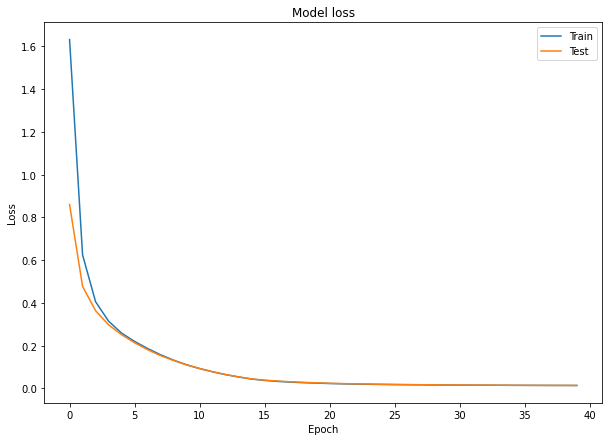

In [29]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

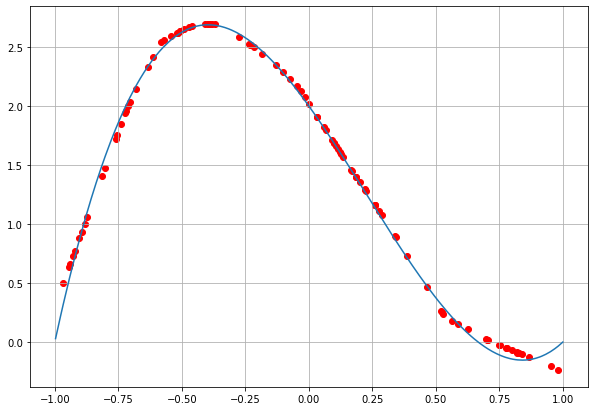

In [30]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(10, 7))
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

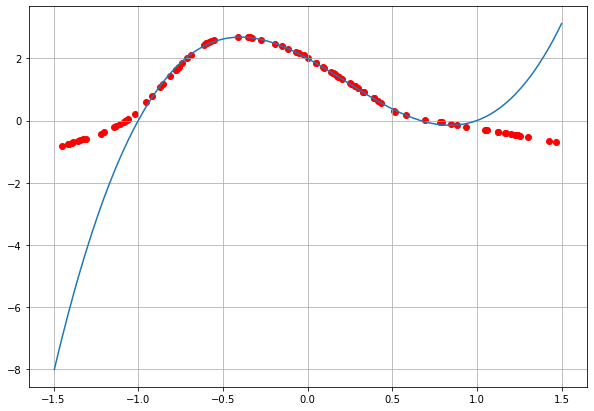

In [32]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
plt.figure(figsize=(10, 7))
plt.scatter(x_predicted, y_predicted,color='r')

#x_valid = np.random.uniform(-1.5, 1.5, 50)
#y_target = a + b * x_valid + c* x_valid**2 + d * x_valid**3 # ideal (target) linear function

plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()